In [ ]:
import numpy as np
from sub_func import abs_dis, ele_list_gen, cor_func_all, swap_step
from random import randrange
import math
import multiprocessing as mp
import time
from random import randrange
from fitter import Fitter
from IPython.display import clear_output
import math
import matplotlib.pyplot as plt
from itertools import combinations
import os

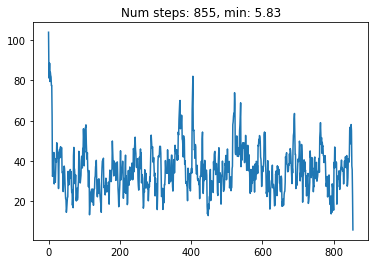

iter: <built-in function iter>, step: 855


In [3]:
ele_list = ele_list_gen(0.45, 0.2, 0.35, mode='randchoice')
cor_func = cor_func_all(ele_list)
cor_list = []

step_count = 0
cor_func_raw = cor_func
while True:
    action = np.array([randrange(108), randrange(108)])
    ele_list_n, r, cor_func_n, _ = swap_step(action, cor_func_raw, ele_list, 0)
    r_ = np.exp(r/3)
    if np.random.rand() <= np.min([r_, 1]) and cor_func_n != cor_func_raw:
        ele_list = ele_list_n
        cor_func_raw = cor_func_n
        step_count += 1
        cor_list.append(cor_func_n)
        clear_output(True)
        plt.title(f'Num steps: {step_count}, min: {round(np.min(cor_list), 3)}')
        plt.plot(cor_list)
        plt.show()

    if cor_func_n < 6:
        print(f'iter: {iter}, step: {step_count}')
        break

{'gamma': {'a': 9.756145297959836, 'loc': 0.6970323892840713, 'scale': 3.606359995442399}}


,sumsquare_error,aic,bic,kl_div
gamma,0.001257,1319.615096,-11462.772117,inf


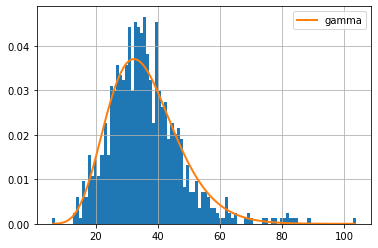

In [17]:
%matplotlib inline
valy_pair = np.array([round(i, 3) for i in cor_list])
f_pair = Fitter(valy_pair, distributions = ['gamma'], timeout = 1500)
f_pair.fit()

print(f_pair.get_best())
f_pair.summary()

In [19]:
ele_list = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure/4515_2_try1.npy')
ind_raw = np.load('/media/wz/7AD631A4D6316195/Projects/SQS_drl/fcc_108/ind_raw.npy')
j = 100

for ele in ele_list:
    ind_cr = np.where(ele == 0)[0]
    ind_co = np.where(ele == 1)[0]
    ind_ni = np.where(ele == -1)[0]
    cr_list = np.array([ind_raw[i] for i in ind_cr])
    co_list = np.array([ind_raw[i] for i in ind_co])
    ni_list = np.array([ind_raw[i] for i in ind_ni])
    directory = f'Cr45Co15Ni40_try{j}'
    parent_dir = '/media/wz/7AD631A4D6316195/Projects/mc_pure/4515/tar10'
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    np.save(f'{path}/Cr45Co15Ni40_cr_chosen.npy', cr_list)
    np.save(f'{path}/Cr45Co15Ni40_co_chosen.npy', co_list)
    np.save(f'{path}/Cr45Co15Ni40_ni_chosen.npy', ni_list)
    j += 1